In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
def NACA4(s):

    #definition of the NACA profile as XXXX
    NACA = s
    c = 1 #chord line

    #NACA XXXX = m p (pt)
    m = int(int(NACA)/1e3)/1e2 #maximum camber
    p = int((int(NACA)-m*1e5)/1e2)/1e1 #location of maximum camber
    pt = int((int(NACA)-m*1e5-p*1e3)) #percentage of thickness with respect to the chord

    #figure definition
    fig = plt.gcf()
    fig.set_size_inches(20,12)
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    
    #mean camber line definition
    if p != 0:
        x = np.append(np.linspace(0,p/100*c,500)[:-1],np.linspace(p/100*c,c,250))
        x_pc = x<(p*c) #masked array to create the piece-wise function

        yc1 = ((c*m)/(p**2))*(2*p*(x/c)-(x/c)**2)
        yc2 = ((c*m)/((1-p)**2))*((1-2*p)+2*p*(x/c)-(x/c)**2)

        yc = np.zeros(np.shape(x))

        for i in range(np.shape(x)[0]):
            if x_pc[i] == True:
                yc[i] = yc1[i]
            else:
                yc[i] = yc2[i]

        #mean camber line derivative
        dyc1dx = (2*m)/(p**2)*(p-(x/c))
        dyc2dx = (2*m)/((1-p)**2)*(p-(x/c))

        dycdx = np.zeros(np.shape(x))

        for i in range(np.shape(x)[0]):
            if x_pc[i] == True:
                dycdx[i] = dyc1dx[i]
            else:
                dycdx[i] = dyc2dx[i]

        theta = np.arctan(dycdx)

        ax1.plot(x,yc1,'--k',label='yc1')
        ax1.plot(x,yc2,'-.k',label='yc2')
        ax1.plot(x,0.01*x_pc,':',color='grey', label='Masked matrix')
        ax1.plot(x,yc,label='Mean camber')
        ax1.legend()
    else:
        #symmetric airfoil camber line
        x = np.linspace(0,c,750)
        yc = np.zeros(np.shape(x))

        ax1.plot(x,yc,label='Mean camber')
        ax1.legend()


    #thickness
    if p != 0:
        yt = 5*pt/100*(0.2969*np.sqrt(x/c)-0.1260*(x/c)-0.3516*(x/c)**2+0.2843*(x/c)**3-0.1036*(x/c)**4)
        xu = x - yt*np.sin(theta)
        xl = x + yt*np.sin(theta)
        yu = yc + yt*np.cos(theta)
        yl = yc - yt*np.cos(theta)

        ax2.set_xlim(-c*0.1,1.1*c)
        ax2.axis('equal')
        ax2.axis('off')
        ax2.plot(xu,yu,'b')
        ax2.plot(xl,yl,'b')
        ax2.fill_between(x, yu, yl,facecolor='blue',alpha=0.1)
        ax2.plot(x,yc,'r',linewidth=0.7)
        ax2.plot([0,c],[0,0],'g',linewidth=0.6)
        
        return xu, xl, yu, yl
        
    else:
        yt = 5*pt/100*(0.2969*np.sqrt(x/c)-0.1260*(x/c)-0.3516*(x/c)**2+0.2843*(x/c)**3-0.1036*(x/c)**4)

        ax2.set_xlim(-c*0.1,1.1*c)
        ax2.axis('equal')
        ax2.axis('off')
        ax2.plot(x,yt,'b')
        ax2.plot(x,-yt,'b')
        ax2.fill_between(x, -yt, yt,facecolor='blue',alpha=0.1)
        ax2.plot(x,yc,'r',linewidth=0.7)
        ax2.plot([0,c],[0,0],'g',linewidth=0.6)

        return x, x, yt, -yt

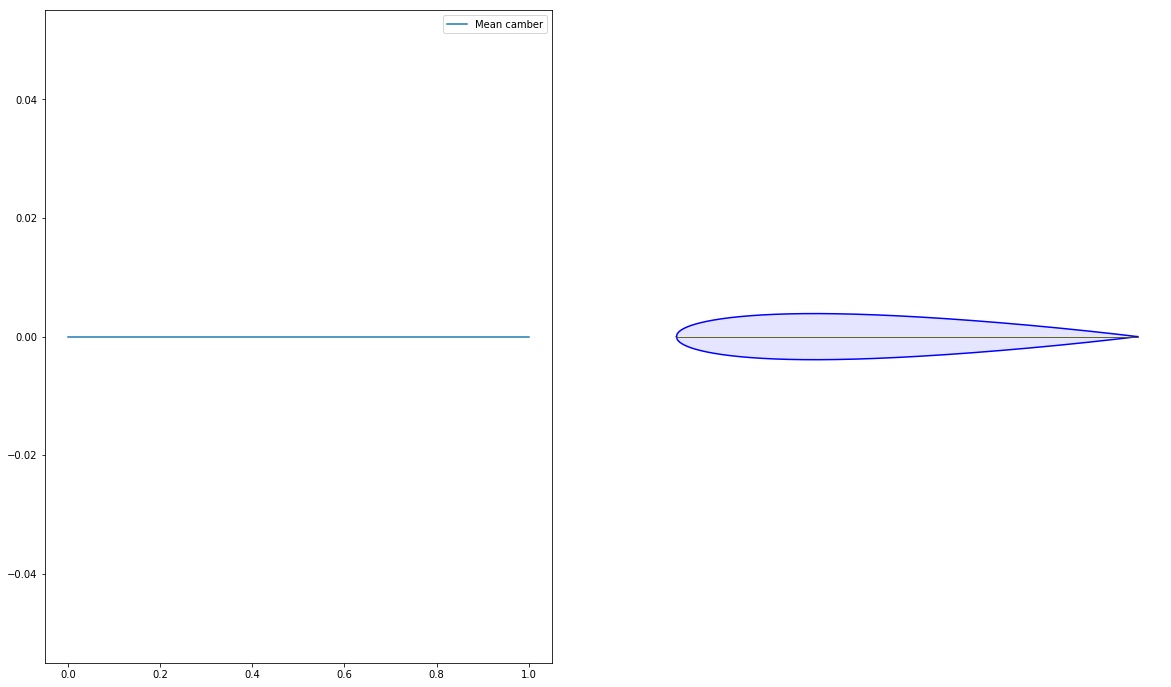

In [59]:
xu, xl, yu, yl = NACA4('0010')

## Stuff for mesh generation - simpleGrading

Equations for simple grading are:

$$
\begin{Bmatrix}
\delta_1 = k \delta_0 && \delta_2= k\delta_1 = k^2 \delta_0 && \delta_{N-1}=k^{N-1}\delta_0 \\
&& \varepsilon = \dfrac{\delta_e}{\delta_s} = \dfrac{\delta_{N-1}}{\delta_0} && \delta_{N-1}=\varepsilon\delta_0
\end{Bmatrix} \longrightarrow {\varepsilon = k^{N-1}}
$$


$$
L= \sum\limits^{N-1}_{i=0} \delta_i = \delta_0 + \delta_1 + \delta_2 + \delta_3 + ... + \delta_{N-1} = k^0\delta_0 + k^1\delta_0 + k^2\delta_0 + k^3\delta_0 + ... + k^{N-1}\delta_0 = \delta_0 \sum\limits^{N-1}_{i=0} k^{i} \longrightarrow \delta_0 = \dfrac{L}{\sum\limits^{N-1}_{i=0} k^i} 
$$

<img src="simpleGrading.svg" alt="simple-grading pic should be here" style="width: 500px;"/>

In [8]:
def simple_grading(N, expRatio, L):
    delta = np.zeros(N) #size of each cell array
    nodes = np.zeros(N+1) #position of the nodes

    kVal = expRatio**((1)/(N-1)) 
    k = np.zeros(N) #increment of each cell

    for i in range(N):
        k[i] = kVal**(i) 

    deltaS = L/np.sum(k)  #first cell size 

    delta = deltaS*k #size of each cell
    
    for i in range(N):
        nodes[i+1] = nodes[i] + delta[i]
        
#    return nodes, delta
    return nodes

In [9]:
def grading_plot(x): #nodes should be imported

    y = 0.5*np.ones(np.shape(x)[0])
    
    fig, ax = plt.subplots(figsize=(20, 1), dpi=100)
        
    ax.set_xlim(-x[1]*0.5,1.1*x[-1])
    ax.set_ylim(0,1)
    ax.axis('off')
    ax.plot([x[0],x[-1]],[y[0],y[-1]],'k')
    ax.scatter(x,y,c='k')

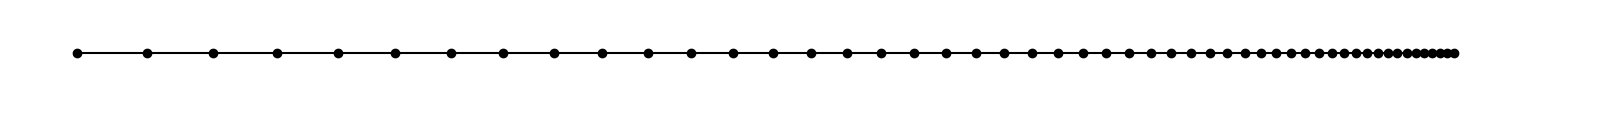

In [10]:
nodes = simple_grading(50, 0.1, 1)
grading_plot(nodes)

## Stuff for mesh generation - multiGrading

Simply dividing the hwole length L in the number of segments specified - having each segment a length, number of cells and expansion ratio that works as simpleGrading

In [11]:
def multi_grading(perc, cells, eps, N, L): 
    
    #some initial shape and value comprobations
    if np.sum(perc) != 1:
        print('Bad percentage array input')
        return

    if np.sum(cells) != 1:
        print('Bad cell array input')
        return
    
    if np.shape(perc)[0] != np.shape(cells)[0] or np.shape(perc)[0] != np.shape(eps)[0] or np.shape(cells)[0] != np.shape(eps)[0]:
        print('Non equal vector definition')
        return
        
    segmentN = (N*cells) #cells per segment
    restCells = np.modf(segmentN)[0] #in case there are decimal values
    segmentN = np.trunc(segmentN) #integer value of the cells

    i = np.sum(restCells) #distributor of the 'decimal' parts of the cells
    while i > 0:
        segmentN[np.argmax(restCells)] = segmentN[np.argmax(restCells)] + int(i)
        restCells[np.argmax(restCells)] = 0
        i -= 1
   
    segmentL = (L*perc) #length per segment

    nodes = np.zeros(N+1) #number of nodes
        
    for i in range(np.shape(perc)[0]):
        nodesTemp = simple_grading(int(segmentN[i]), eps[i], segmentL[i])
        for j in range(np.shape(nodesTemp)[0]):
            if i == 0:
                nodes[j] = nodesTemp[j]
            else:
                nodes[int(np.cumsum(segmentN)[i-1]) + j] = nodesTemp[j] + nodes[int(np.cumsum(segmentN)[i-1])]

    return nodes

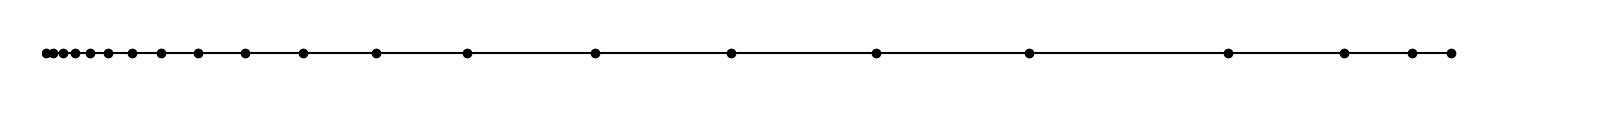

In [12]:
perc = np.array([0.3,0.4,0.3])
cells = np.array([0.6,0.2,0.2])
exp = np.array([12,1.2,0.2])

xAxis = multi_grading(perc, cells, exp, 20, 1)
grading_plot(xAxis)

## NACA 4 digit points referred to the selected horizontal axis

Interpolating the whole bunch of points from xu matrix (and its respectives yu coordinates) and from xl matrix (and yl) with the new axis points

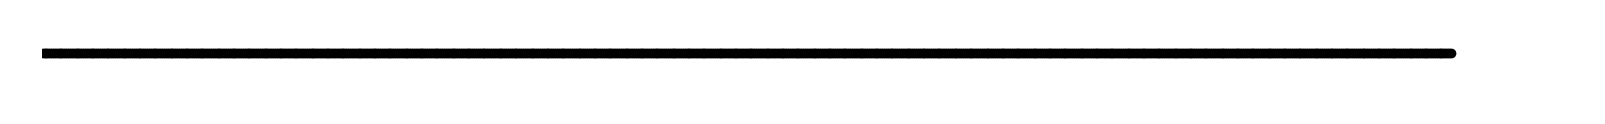

In [13]:
grading_plot(xu)

In [18]:
def airfoilTrueX(newX, xu, yu, xl, yl):
    yuAxis = np.interp(newX, xu, yu)
    ylAxis = np.interp(newX, xl, yl)
    return yuAxis, ylAxis

In [19]:
yuAxis, ylAxis = airfoilTrueX(xAxis, xu, yu, xl, yl)

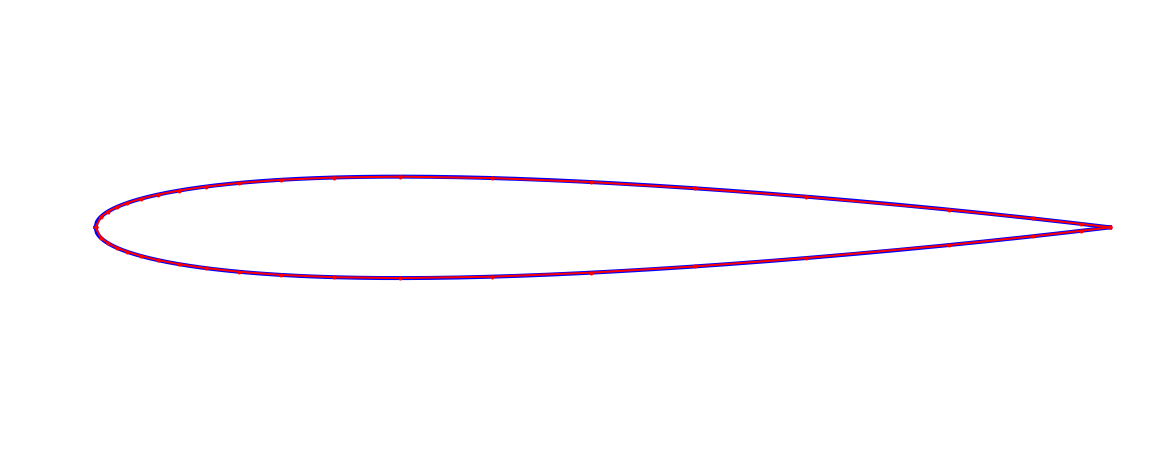

In [25]:
fig = plt.gcf()
fig.set_size_inches(20,8)
plt.axis('equal')
plt.axis('off')
plt.plot(xu,yu,'b',linewidth = 4)
plt.plot(xl,yl,'b',linewidth = 4)
plt.plot(xAxis,yuAxis,'r.-', linewidth = 2)
plt.plot(xAxis,ylAxis,'r.-', linewidth = 2)

## Points storage in file

In [28]:
prof = np.zeros((np.shape(xAxis)[0],3))
prof[:, 0] = xAxis
prof[:, 1] = ylAxis
prof[:, 2] = yuAxis

#let's force the leading edge to be (0,0,0) and the trailing edge to be (1,0,0) to avoid too small numerical values
prof[0,:] = np.array([0.0,0.0,0.0])
prof[-1,:] = np.array([1.0,0.0,0.0])

print(prof)

[[ 0.          0.          0.        ]
 [ 0.00541508 -0.01057376  0.01057376]
 [ 0.01220261 -0.01560103  0.01560103]
 [ 0.02071045 -0.01998187  0.01998187]
 [ 0.03137461 -0.0241479   0.0241479 ]
 [ 0.04474162 -0.0282414   0.0282414 ]
 [ 0.0614965  -0.03230641  0.03230641]
 [ 0.08249794 -0.03632177  0.03632177]
 [ 0.1088222  -0.04020896  0.04020896]
 [ 0.14181838 -0.04381849  0.04381849]
 [ 0.18317748 -0.04691178  0.04691178]
 [ 0.23501908 -0.04913761  0.04913761]
 [ 0.3        -0.05000581  0.05000581]
 [ 0.39107672 -0.04860058  0.04860058]
 [ 0.48786017 -0.04468221  0.04468221]
 [ 0.59070794 -0.03853031  0.03853031]
 [ 0.7        -0.03028043  0.03028043]
 [ 0.84105707 -0.01745033  0.01745033]
 [ 0.92354775 -0.00882317  0.00882317]
 [ 0.97178859 -0.00335567  0.00335567]
 [ 1.          0.          0.        ]]


Although a most intelligent way of saving them is beggining from the trailing edge and ending again there, having the points ordered going first towards negative X and then towards positive X (i.e. from 1 to 0 and from 0 to 1). Upper surface was chosen as first one to follow.

In [56]:
profile = np.zeros((2*np.shape(xAxis)[0]-1,2))

j = 0

for i in range(np.shape(prof)[0]-1,-1,-1):
    profile[j,0] = prof[i,0]
    profile[j,1] = prof[i,2]
    j += 1
    
for i in range(np.shape(prof)[0]-1):
    profile[i+np.shape(prof)[0],0] = prof[i+1,0]
    profile[i+np.shape(prof)[0],1] = prof[i+1,1]  
    
print(profile)

[[ 1.          0.        ]
 [ 0.97178859  0.00335567]
 [ 0.92354775  0.00882317]
 [ 0.84105707  0.01745033]
 [ 0.7         0.03028043]
 [ 0.59070794  0.03853031]
 [ 0.48786017  0.04468221]
 [ 0.39107672  0.04860058]
 [ 0.3         0.05000581]
 [ 0.23501908  0.04913761]
 [ 0.18317748  0.04691178]
 [ 0.14181838  0.04381849]
 [ 0.1088222   0.04020896]
 [ 0.08249794  0.03632177]
 [ 0.0614965   0.03230641]
 [ 0.04474162  0.0282414 ]
 [ 0.03137461  0.0241479 ]
 [ 0.02071045  0.01998187]
 [ 0.01220261  0.01560103]
 [ 0.00541508  0.01057376]
 [ 0.          0.        ]
 [ 0.00541508 -0.01057376]
 [ 0.01220261 -0.01560103]
 [ 0.02071045 -0.01998187]
 [ 0.03137461 -0.0241479 ]
 [ 0.04474162 -0.0282414 ]
 [ 0.0614965  -0.03230641]
 [ 0.08249794 -0.03632177]
 [ 0.1088222  -0.04020896]
 [ 0.14181838 -0.04381849]
 [ 0.18317748 -0.04691178]
 [ 0.23501908 -0.04913761]
 [ 0.3        -0.05000581]
 [ 0.39107672 -0.04860058]
 [ 0.48786017 -0.04468221]
 [ 0.59070794 -0.03853031]
 [ 0.7        -0.03028043]
 

In [57]:
np.savetxt("profile.csv", profile, delimiter=",")